# Week 10-6-2 BERT를 활용한 감성 분석 - 영어 Lab

1. thinq_e_review_result.csv 파일을 열어서 review_df에 저장하시오.

In [1]:
# 데이터 읽기

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week10')
review_df=pd.read_csv("thinq_e_review_result.csv")

review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  \
0      This app no longer works. It has just updated ...   
1      Everything worked fine until a week or so ago....   
2      App doesn't work with wired TV connection. EDI...   
3      I'm trying this again by have Alexa connection...   
4      Just embarrassing. Absolutely, 100%, will not ...   
...                                                  ...   
11275                            Good app. useful so far   
11276           Its been helpful. Hope it stays that way   
11277  Worked like it should and gave me feedback tha...   
11278                            error routed device.. .   
11279               Not connected with washing machine 😞   

                                               comment_n  
0      ['app', 'longer', 'work', 'updated', 'tell', '...  
1      ['everything', 'worked', 'fine', 'week', 'ago'...  
2      ['app', 'work', 'wired', 'tv', 'connection', '...  
3      ['trying', 'alexa', 'connection', 'turn', 'lg'...  
4      ['embarrassing', 'absolutely', 'connect', 'goo...  
...                                                  ...  
11275                   ['good', 'app', 'useful', 'far']  
11276                 ['helpful', 'hope', 'stay', 'way']  
11277  ['worked', 'like', 'gave', 'feedback', 'wanting']  
11278                      ['error', 'routed', 'device']  
11279                ['connected', 'washing', 'machine']  

[11280 rows x 5 columns]

2. review_df에서 star가 3인 레코드(중립 레코드)를 삭제하시오.

In [2]:
# 목표 변수 만들기(이전 예제와 동일)
del_index=review_df[review_df['star']==3].index
review_df.drop(del_index,axis=0,inplace=True)
review_df.shape

(10153, 5)

3. star가 4이상인 경우 긍정(1), 2이하인 경우 부정(0)으로 분류해서 sentiment 컬럼에 추가하시오.

In [3]:
review_df['sentiment']=review_df['star'].apply(lambda x: 1 if x>=4 else 0)
review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  \
0      This app no longer works. It has just updated ...   
1      Everything worked fine until a week or so ago....   
2      App doesn't work with wired TV connection. EDI...   
3      I'm trying this again by have Alexa connection...   
4      Just embarrassing. Absolutely, 100%, will not ...   
...                                                  ...   
11275                            Good app. useful so far   
11276           Its been helpful. Hope it stays that way   
11277  Worked like it should and gave me feedback tha...   
11278                            error routed device.. .   
11279               Not connected with washing machine 😞   

                                               comment_n  sentiment  
0      ['app', 'longer', 'work', 'updated', 'tell', '...          0  
1      ['everything', 'worked', 'fine', 'week', 'ago'...          0  
2      ['app', 'work', 'wired', 'tv', 'connection', '...          0  
3      ['trying', 'alexa', 'connection', 'turn', 'lg'...          0  
4      ['embarrassing', 'absolutely', 'connect', 'goo...          0  
...                                                  ...        ...  
11275                   ['good', 'app', 'useful', 'far']          1  
11276                 ['helpful', 'hope', 'stay', 'way']          1  
11277  ['worked', 'like', 'gave', 'feedback', 'wanting']          1  
11278                      ['error', 'routed', 'device']          0  
11279                ['connected', 'washing', 'machine']          0  

[10153 rows x 6 columns]

<AxesSubplot:>

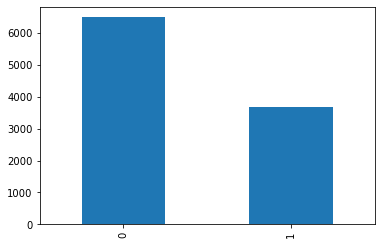

In [4]:
# 목표 변수 분포
review_df['sentiment'].value_counts().plot(kind='bar')

4. 분류 모델의 성능을 평가하는 함수 get_clf_eval을 작성하시오.

In [5]:
# 성능 평가 함수(앞과 동일)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

5. comment 컬럼으로 감성 분석을 하기 위해서 훈련 데이터와 테스트 데이터를 분할하시오.

In [6]:
# 훈련 데이터, 테스트 데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(review_df['comment'], review_df['sentiment'], test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((7107,), (3046,))

6. BERT를 이용하여 감성 분석을 수행하고 성능을 평가하시오.